In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    A single cell estimate of the population 16+ for each state.

    Controls for Hispanic Origin by age and sex.

    Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [6]:
df=pd.read_csv('census_income.csv')
df.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Data Preprocessing

In multiple places data is filled with '?'

In [3]:
df.shape

(32560, 15)

There are 15 rows and 32560 rows

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no null data in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [12]:
df=df.replace(" ?",np.NaN)

In [13]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='Age'>

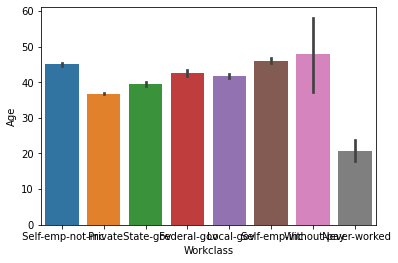

In [23]:

sns.barplot(x='Workclass',y='Age',data=df)

In [24]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='count'>

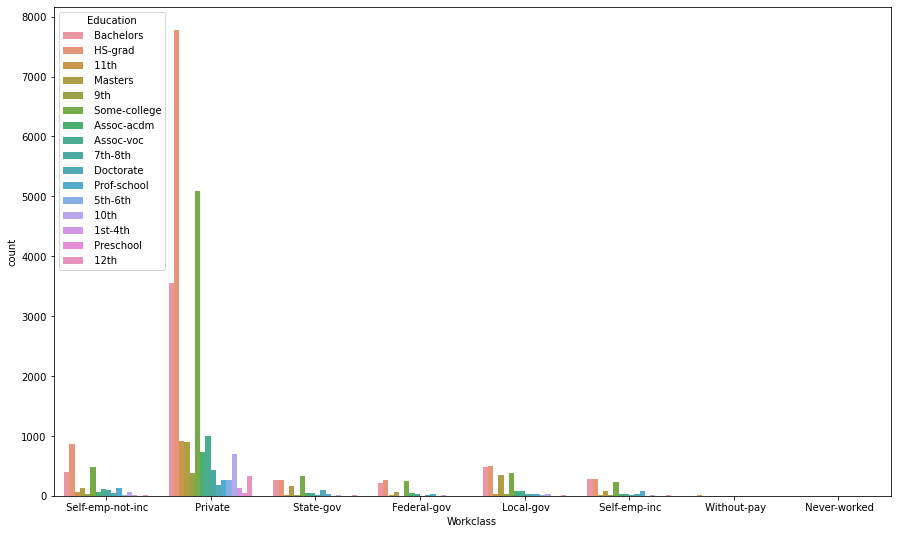

In [29]:
plt.figure(figsize=(15,9))
sns.countplot(x='Workclass',hue='Education',data=df)

In [45]:
def fill_Workclass(cols):
    w_class=cols[0]
    education=cols[1]
    if pd.isnull(w_class):
        if education=='Bachelors':
            return 'Private'
        elif education=='HS-grad':
            return 'Private'
        elif education=='11th':
            return 'Self-emp-not-inc'
        elif education=='Masters':
            return 'Private'
        elif education=='9th':
            return 'Self-emp-not-inc'
        elif education=='Some-college':
            return 'Private'
        elif education=='Assoc-voc':
            return 'Private'
        elif education=='Assoc-acdm':
            return 'Private'
        elif education=='7th-8th':
            return 'Private'
        elif education=='Doctorate':
            return 'Private'
        elif education=='Prof-school':
            return 'Private'
        elif education=='5th-6th':
            return 'Private'
        elif education=='10th':
            return 'Private'
        elif education=='1st-4th':
            return 'Private'
        elif education=='Preschool':
            return 'Private'
        else:
            return 'Private'
    else:
        return w_class
        

In [46]:
df['Workclass']=df[['Workclass','Education']].apply(fill_Workclass,axis=1)

In [30]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:>

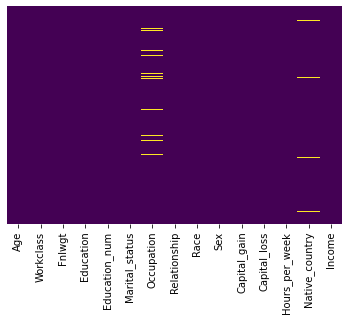

In [47]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

condition based replacement of Country is not feasible as the number of countries are more

In [40]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

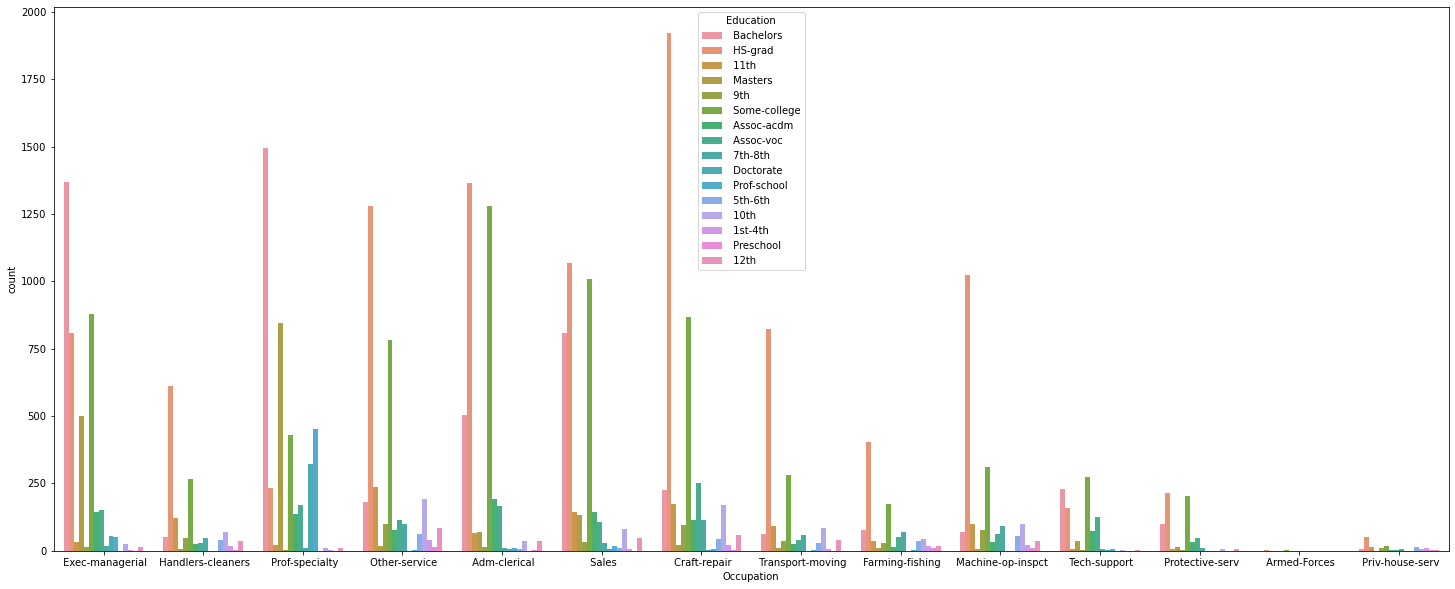

In [43]:
plt.figure(figsize=(25,10))
sns.countplot(x='Occupation',hue='Education',data=df)

In [51]:
def fill_Occupation(cols):
    occupation=cols[0]
    education=cols[1]
    if pd.isnull(occupation):
        if education=='Bachelors':
            return 'Prof-specialty'
        elif education=='HS-grad':
            return 'Craft-repair'
        elif education=='11th':
            return 'Craft-repair'
        elif education=='9th':
            return 'Prof-specialty'
        elif education=='Masters':
            return 'Other-service'
        elif education=='Some-college':
            return 'Adm-clerical'
        elif education=='Assoc-voc':
            return 'Adm-clerical'
        elif education=='Assoc-acdm':
            return 'Craft-repair'
        elif education=='7th-8th':
            return 'Other-service'
        elif education=='Doctorate':
            return 'Prof-specialty'
        elif education=='Prof-school':
            return 'Prof-specialty'
        elif education=='5th-6th':
            return 'Other-service'
        elif education=='10th':
            return 'Other-service'
        elif education=='1st-4th':
            return 'Other-service'
        elif education=='Preschool':
            return 'Other-service'
        else:
            return 'Prof-specialty'
    else:
        return occupation
        

In [52]:
df['Occupation']=df[['Occupation','Education']].apply(fill_Occupation,axis=1)

In [55]:
#data['Native Country'].fillna(data['Native Country'].mode()[0], inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

<AxesSubplot:>

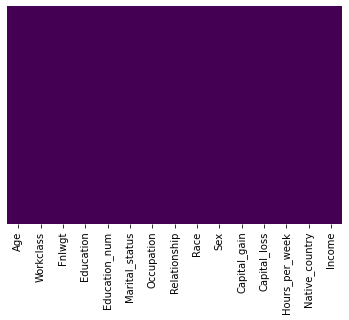

In [56]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Found all the Null values are filled without any data loss

# EDA

[Text(0, 0, ' Exec-managerial'),
 Text(1, 0, ' Handlers-cleaners'),
 Text(2, 0, ' Prof-specialty'),
 Text(3, 0, ' Other-service'),
 Text(4, 0, ' Adm-clerical'),
 Text(5, 0, ' Sales'),
 Text(6, 0, ' Craft-repair'),
 Text(7, 0, ' Transport-moving'),
 Text(8, 0, ' Farming-fishing'),
 Text(9, 0, ' Machine-op-inspct'),
 Text(10, 0, ' Tech-support'),
 Text(11, 0, 'Prof-specialty'),
 Text(12, 0, ' Protective-serv'),
 Text(13, 0, ' Armed-Forces'),
 Text(14, 0, ' Priv-house-serv')]

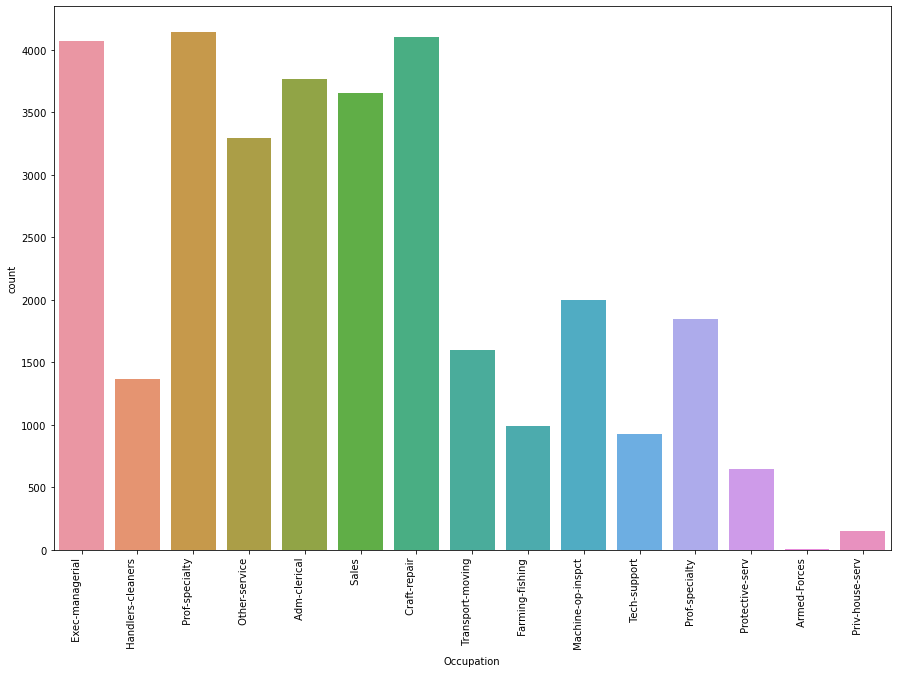

In [72]:
plt.figure(figsize=(15,10))

chart=sns.countplot(x='Occupation',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')


The major occupation count as per order is as follows:
    (i) Prof-specialty
    
    (ii) Craft-rapair
    
    (iii) Exec-management
    
    (iv) Adm-Clerical
    
    (v) Sales
    
    (vi) Other-service
     
    (vii) Machine-op-inspct

[Text(0, 0, ' Bachelors'),
 Text(1, 0, ' HS-grad'),
 Text(2, 0, ' 11th'),
 Text(3, 0, ' Masters'),
 Text(4, 0, ' 9th'),
 Text(5, 0, ' Some-college'),
 Text(6, 0, ' Assoc-acdm'),
 Text(7, 0, ' Assoc-voc'),
 Text(8, 0, ' 7th-8th'),
 Text(9, 0, ' Doctorate'),
 Text(10, 0, ' Prof-school'),
 Text(11, 0, ' 5th-6th'),
 Text(12, 0, ' 10th'),
 Text(13, 0, ' 1st-4th'),
 Text(14, 0, ' Preschool'),
 Text(15, 0, ' 12th')]

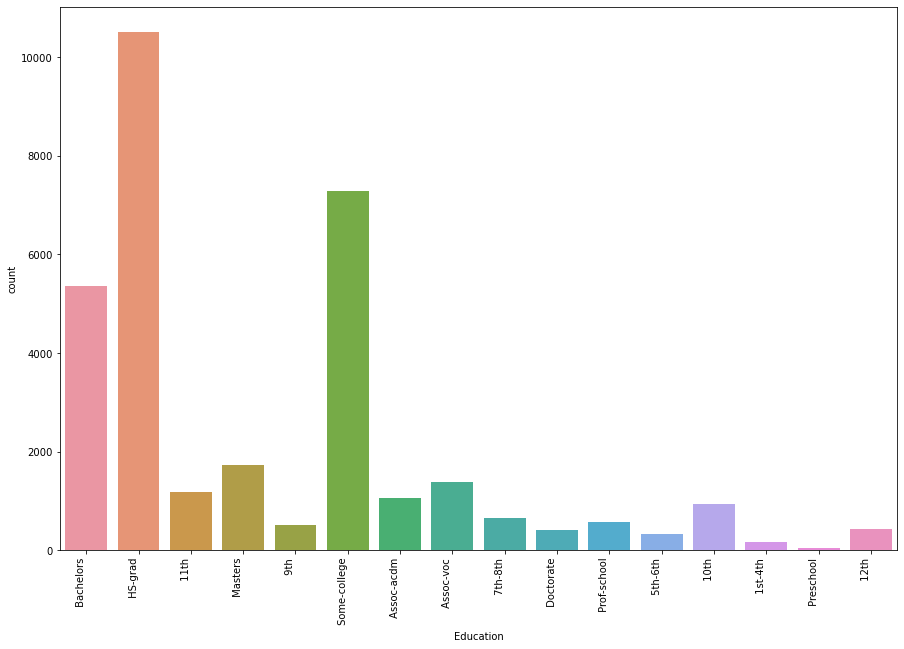

In [74]:
plt.figure(figsize=(15,10))

chart=sns.countplot(x='Education',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')


(i) HS -Grad are more in numbers, Some-college is 2nd and Bachelors in 3rd

(ii) Rest all less in avegare other than Preschool and 1st-4th

<AxesSubplot:xlabel='Race', ylabel='count'>

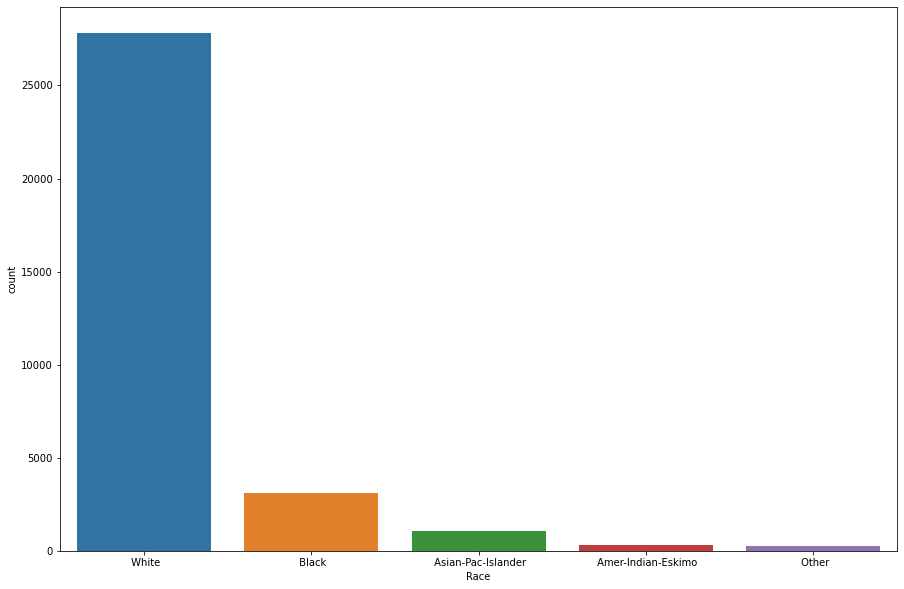

In [77]:
plt.figure(figsize=(15,10))
sns.countplot(x='Race',data=df)

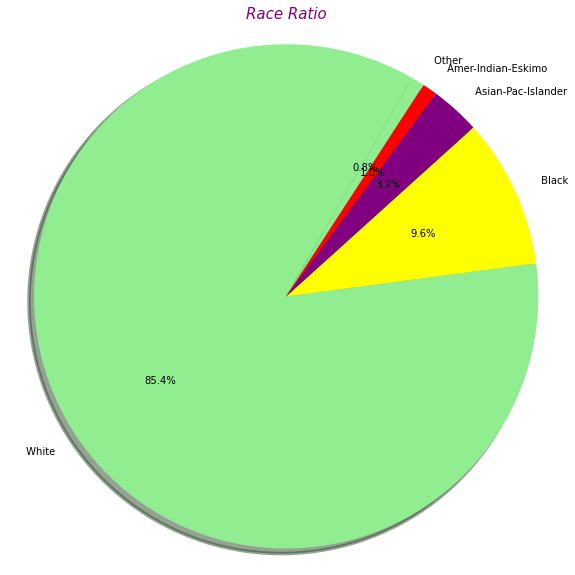

In [82]:
plt.figure(figsize=(10,10))
plt.pie(x=df['Race'].value_counts(),labels=df['Race'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Race Ratio',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()


85 % are White, 9.6% are black, 3.2% Asian Pac Islander,1% Amer-Indian Eskimo and 0.8% other 

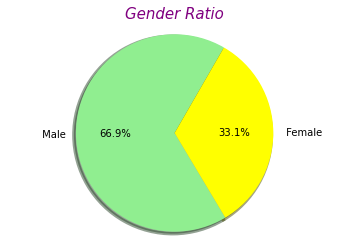

In [80]:
plt.pie(x=df['Sex'].value_counts(),labels=df['Sex'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Gender Ratio',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()


67% employees male and 33% female

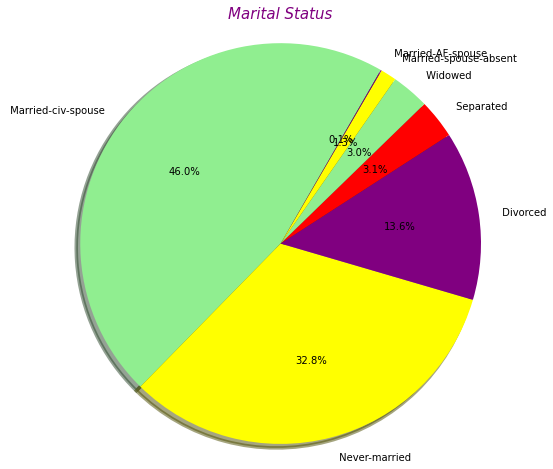

In [84]:
plt.figure(figsize=(8,8))
plt.pie(x=df['Marital_status'].value_counts(),labels=df['Marital_status'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Marital Status',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()


<AxesSubplot:xlabel='Income', ylabel='count'>

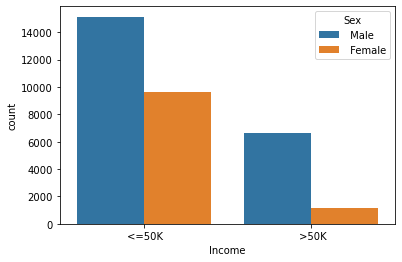

In [57]:
sns.countplot(x='Income',hue='Sex',data=df)

(i) Counts of <=50K is much more

(ii) Number of Females are less for >50K

<AxesSubplot:xlabel='Income', ylabel='count'>

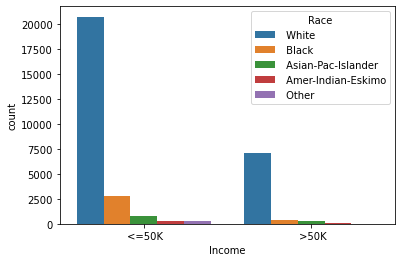

In [58]:
sns.countplot(x='Income',hue='Race',data=df)

White are holding dominating numbers in both the category <=50K and >50K



<AxesSubplot:xlabel='Income', ylabel='count'>

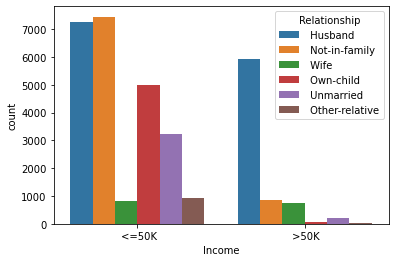

In [60]:
sns.countplot(x='Income',hue='Relationship',data=df)

 Not in family,Own-child,unmarried members are found more in <=50K category



<AxesSubplot:xlabel='Income', ylabel='count'>

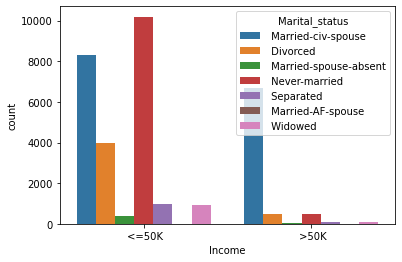

In [61]:
sns.countplot(x='Income',hue='Marital_status',data=df)

(i) Max Never Married people are more in <=50K 

(ii) Divored are more in numbers <=50K

<AxesSubplot:xlabel='Income', ylabel='count'>

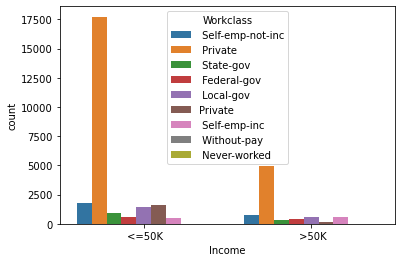

In [62]:
sns.countplot(x='Income',hue='Workclass',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

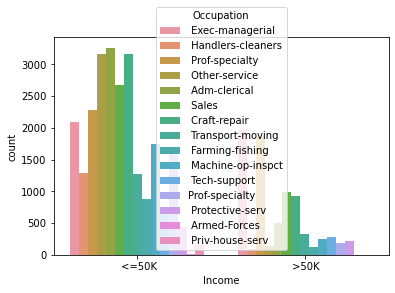

In [63]:
sns.countplot(x='Income',hue='Occupation',data=df)

The major occupation count as per order is as follows:
    (i) Prof-specialty
    
    (ii) Craft-rapair
    
    (iii) Exec-management
    
    (iv) Adm-Clerical
    
    (v) Sales
    
    (vi) Other-service
     
    (vii) Machine-op-inspct

[Text(0, 0, ' United-States'),
 Text(1, 0, ' Cuba'),
 Text(2, 0, ' Jamaica'),
 Text(3, 0, ' India'),
 Text(4, 0, ' Mexico'),
 Text(5, 0, ' South'),
 Text(6, 0, ' Puerto-Rico'),
 Text(7, 0, ' Honduras'),
 Text(8, 0, ' England'),
 Text(9, 0, ' Canada'),
 Text(10, 0, ' Germany'),
 Text(11, 0, ' Iran'),
 Text(12, 0, ' Philippines'),
 Text(13, 0, ' Italy'),
 Text(14, 0, ' Poland'),
 Text(15, 0, ' Columbia'),
 Text(16, 0, ' Cambodia'),
 Text(17, 0, ' Thailand'),
 Text(18, 0, ' Ecuador'),
 Text(19, 0, ' Laos'),
 Text(20, 0, ' Taiwan'),
 Text(21, 0, ' Haiti'),
 Text(22, 0, ' Portugal'),
 Text(23, 0, ' Dominican-Republic'),
 Text(24, 0, ' El-Salvador'),
 Text(25, 0, ' France'),
 Text(26, 0, ' Guatemala'),
 Text(27, 0, ' China'),
 Text(28, 0, ' Japan'),
 Text(29, 0, ' Yugoslavia'),
 Text(30, 0, ' Peru'),
 Text(31, 0, ' Outlying-US(Guam-USVI-etc)'),
 Text(32, 0, ' Scotland'),
 Text(33, 0, ' Trinadad&Tobago'),
 Text(34, 0, ' Greece'),
 Text(35, 0, ' Nicaragua'),
 Text(36, 0, ' Vietnam'),
 Text(37,

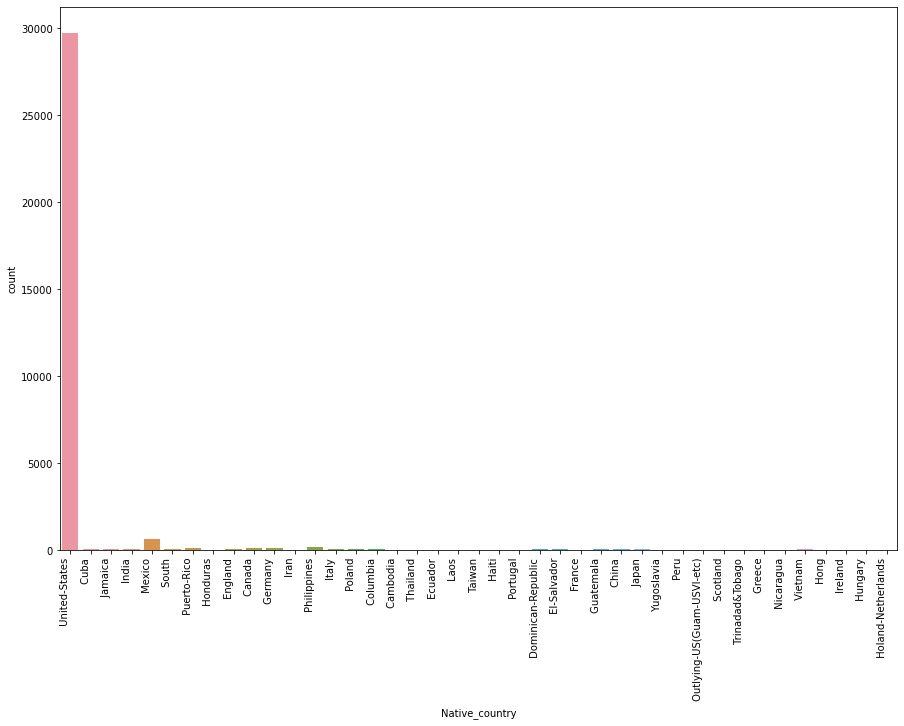

In [68]:
plt.figure(figsize=(15,10))

chart=sns.countplot(x='Native_country',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')


In [69]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

There are no significatn data in Native_coutry, but Maxico in highest number in 
countries other than USA

<Figure size 720x720 with 0 Axes>

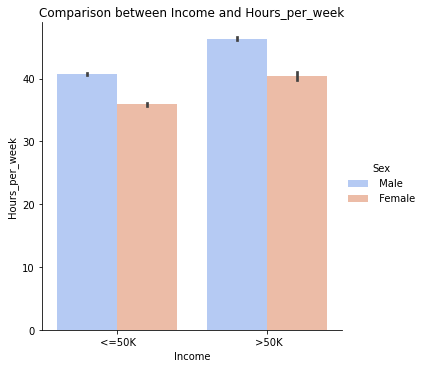

In [70]:
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Hours_per_week',data=df,kind='bar',hue='Sex',palette="coolwarm")
plt.title('Comparison between Income and Hours_per_week')
plt.show()



This shows how the income is related to the hours per week. The income is >=50K when the hours is high for both male and female.

<Figure size 720x720 with 0 Axes>

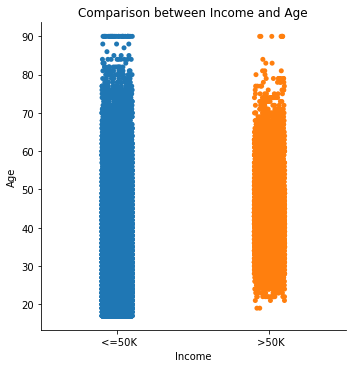

In [85]:
# Visualizing the age of the person who have more income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Age',data=df,kind='strip')
plt.title('Comparison between Income and Age')
plt.show()

All the person earning more than 50K are 20 and above years old

<Figure size 720x720 with 0 Axes>

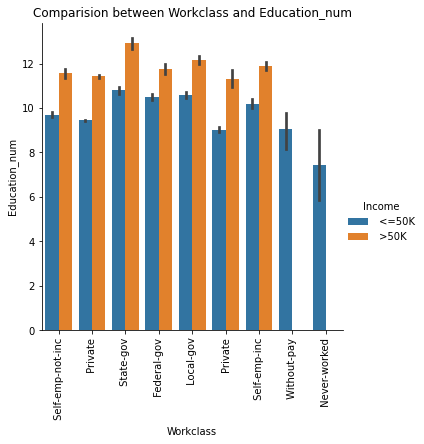

In [86]:
# Visualizing how the income changes with work class of the people
plt.figure(figsize=(10,10))
sns.catplot(x='Workclass',y='Education_num', data=df,kind='bar',hue="Income");
plt.title('Comparision between Workclass and Education_num')
plt.xticks(rotation=90)
plt.show()


(i) In every workclass the count of >50K is more except Without-pay and Never-worked category

(ii) State Govt. employees has highest number of person with income more than 50K

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

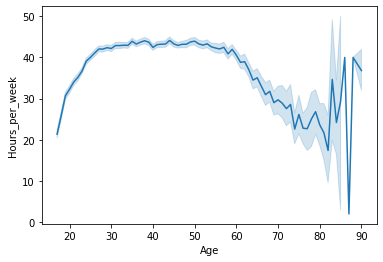

In [90]:
sns.lineplot(x='Age',y='Hours_per_week',data=df)

Hours per week is in good average between age limit of 25 to 60

<AxesSubplot:xlabel='Capital_gain', ylabel='Education_num'>

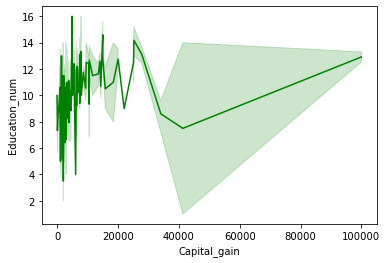

In [93]:
sns.lineplot(x='Capital_gain',y='Education_num',color='g',data=df)

<AxesSubplot:>

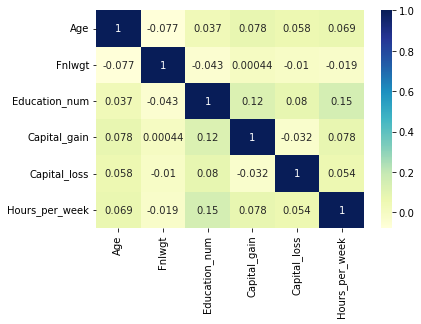

In [96]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='Age', ylabel='Fnlwgt'>

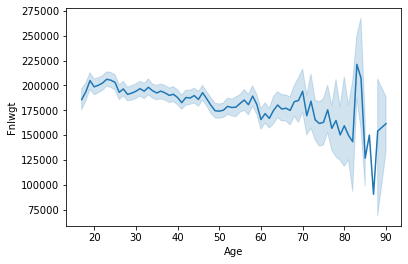

In [101]:
sns.lineplot(x='Age',y='Fnlwgt',data=df)

In [102]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Encoding of Categorical Data

In [103]:
categorical_col = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df[categorical_col] = df[categorical_col].apply(lbl.fit_transform)


<AxesSubplot:>

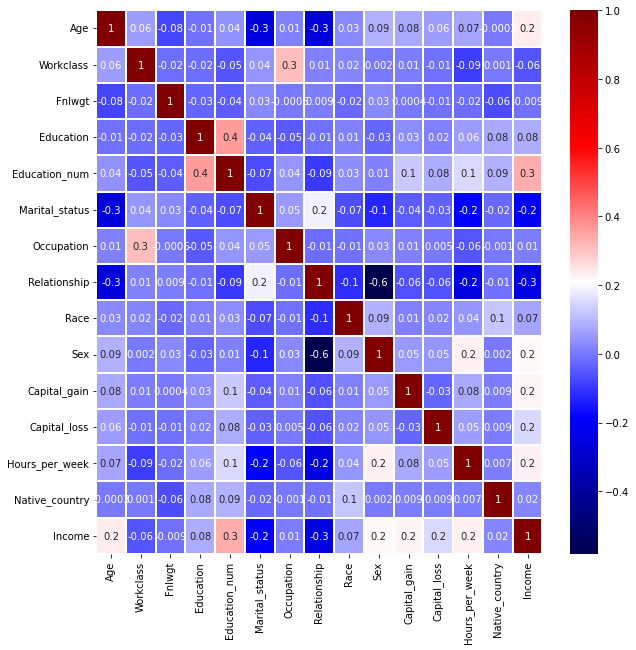

In [104]:
# Visualizing correlation between dependent and independent variables by using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',cmap="seismic",annot=True)


(i) There is availabity of multicolinearity

(ii) Education num is positively correlated with income

(iii) Occupation is positively correalted with workclass

(iv) Ralationship and marital status is negetively correlated with income

# Removing the outliers

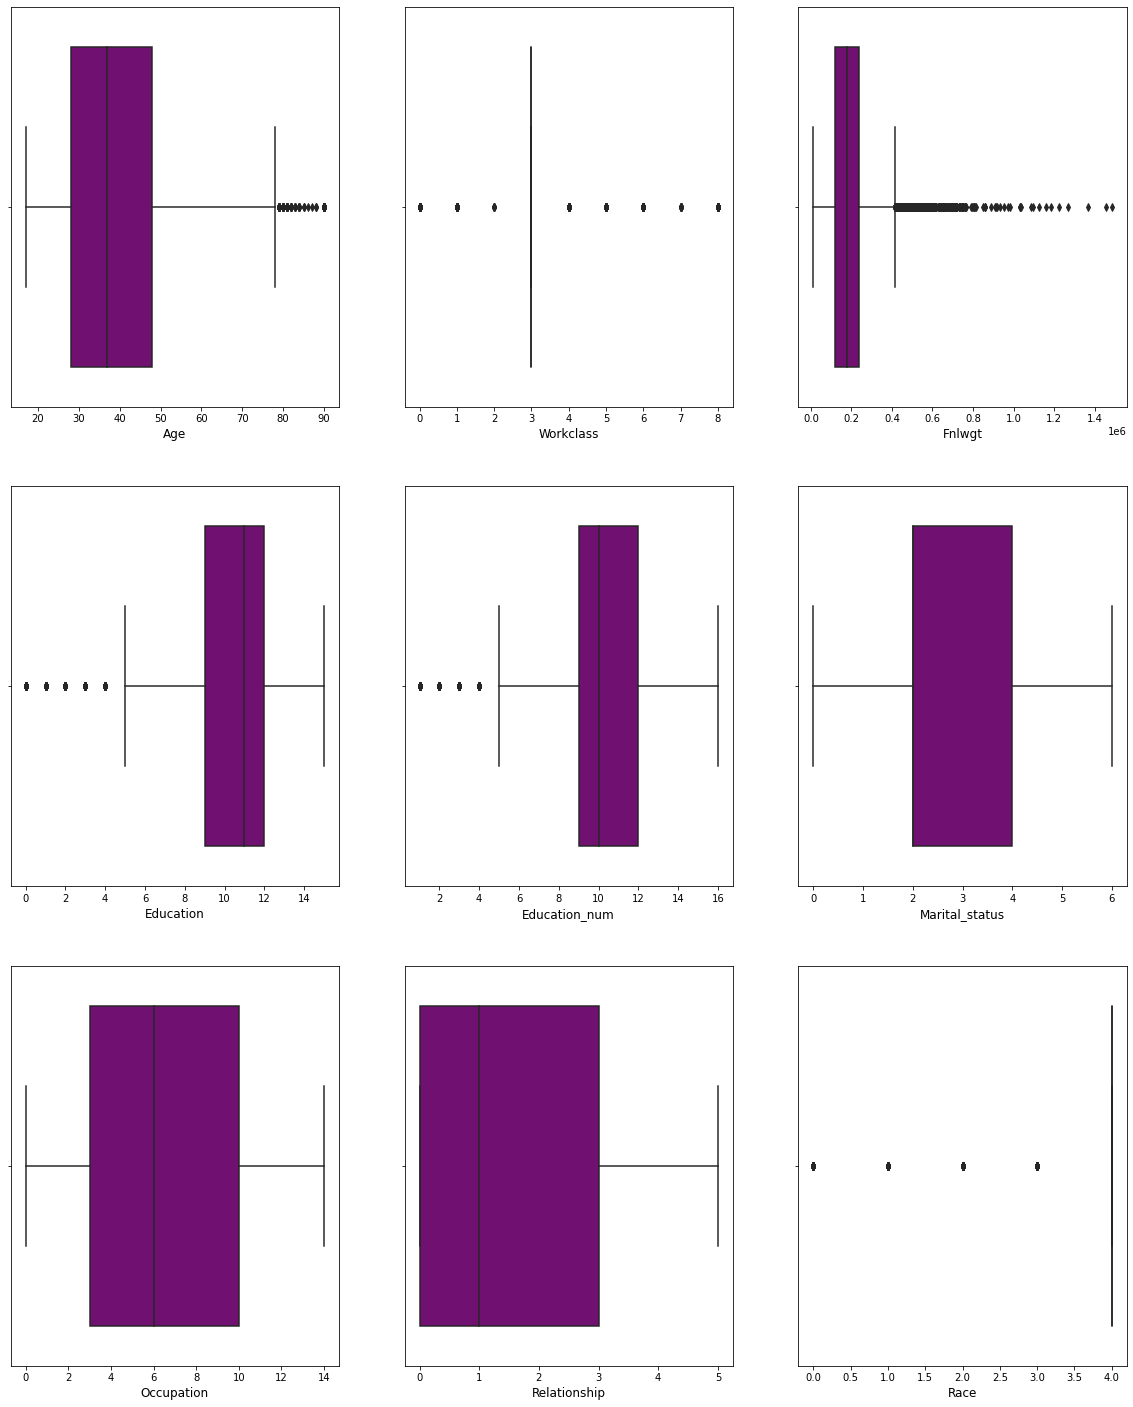

In [106]:
plt.figure(figsize=(20,25))
plotnum=1
for col in df.columns:
    if plotnum<=9:
        ax=plt.subplot(3,3,plotnum)
        sns.boxplot(df[col],color='purple')
        plt.xlabel(col,fontsize=12)
    plotnum+=1
plt.show()

There is availabity of outliers

In [109]:
# Features having outliers and not encoded
features = df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]


In [110]:
from scipy.stats import zscore
z=np.abs(zscore(features))

In [111]:
df.shape

(32560, 15)

In [112]:
df=df[(z<3).all(axis=1)]

In [113]:
df.shape

(29827, 15)

In [114]:
loss=(32560-29827)*100/32560
loss

8.393734643734645

we can accept 8% data loss

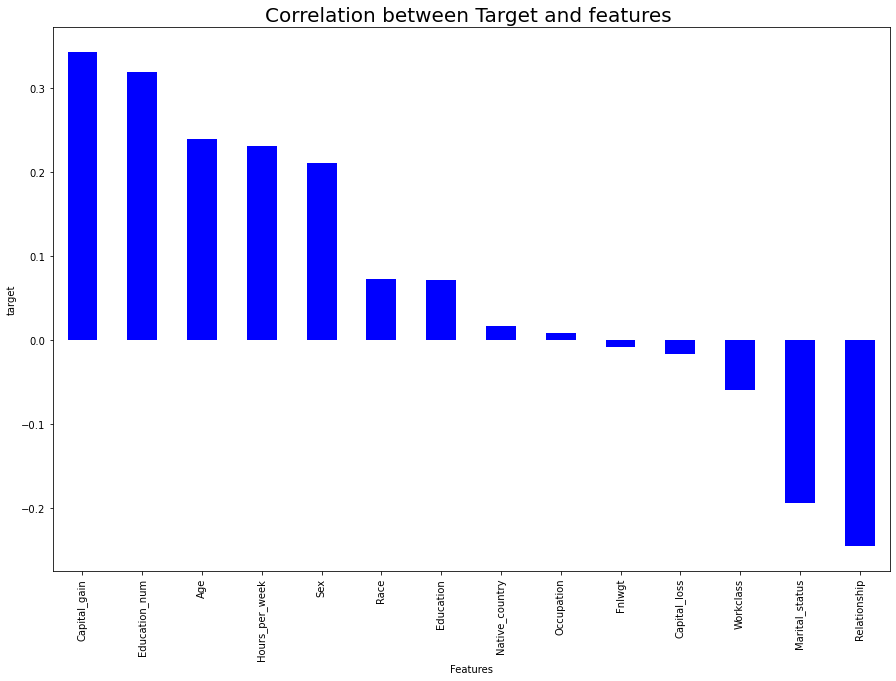

In [116]:
# generationg corraltion bar graph
plt.figure(figsize=(15,10))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between Target and features ',fontsize=20)
plt.show()

Positively related features are 
(i) Capita Gain

(ii) Education_num

(iii) Age

(iv) Hours_per_week

(v) Sex

Negatively related features are 

(i) Relationship

(ii) Marital Status

(iii) Work Class

# Splitting of Target and Features

In [141]:
x=df.drop("Income",axis=1)
y=df['Income']

# Checking and removing the Skewness 

In [142]:
x.skew()

Age                0.491112
Workclass          1.181900
Fnlwgt             0.634168
Education         -0.942866
Education_num     -0.170298
Marital_status    -0.048971
Occupation         0.130215
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
Native_country    -4.335169
dtype: float64

Workclass,Fnlwgt,Educatoin,Capital_gain,Capital_loss has the skewness

In [143]:
# removing the skew ness
skew_cols=['Workclass','Fnlwgt','Education','Capital_gain','Capital_loss']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
x[skew_cols]=scaler.fit_transform(x[skew_cols].values)
x.skew()

Age                0.491112
Workclass          0.138623
Fnlwgt            -0.034910
Education         -0.309464
Education_num     -0.170298
Marital_status    -0.048971
Occupation         0.130215
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       3.074074
Capital_loss      24.868849
Hours_per_week    -0.354170
Native_country    -4.335169
dtype: float64

In [144]:
#applying the log function on extreme positively skewed column
to_log = ['Capital_gain', 'Capital_loss']
x[to_log]=x[to_log].applymap(lambda x: np.log(x+1))


In [145]:
x.skew()

Age                0.491112
Workclass          0.138623
Fnlwgt            -0.034910
Education         -0.309464
Education_num     -0.170298
Marital_status    -0.048971
Occupation         0.130215
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       3.074074
Capital_loss      24.868849
Hours_per_week    -0.354170
Native_country    -4.335169
dtype: float64

In [146]:
x.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
count,29827.000000,2.982700e+04,2.982700e+04,2.982700e+04,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000
mean,38.143729,-5.260187e-16,-1.918798e-16,3.871124e-16,10.077882,2.621752,6.389345,1.479465,3.664901,0.660945,-0.204156,-0.035673,39.896101,36.474268
std,13.357668,1.000017e+00,1.000017e+00,1.000017e+00,2.452841,1.514571,4.337987,1.609835,0.850599,0.473397,0.498156,0.132098,11.139681,5.963267
min,17.000000,-2.851758e+00,-2.581649e+00,-2.165762e+00,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.351947,-0.040976,4.000000,0.000000
25%,27.000000,-1.481651e-01,-6.466762e-01,-4.826512e-01,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,-0.351947,-0.040976,40.000000,38.000000
50%,37.000000,-1.481651e-01,4.393817e-02,8.466753e-02,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,-0.351947,-0.040976,40.000000,38.000000
75%,47.000000,-1.481651e-01,6.010392e-01,3.892476e-01,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,-0.351947,-0.040976,45.000000,38.000000
max,79.000000,2.533862e+00,2.679128e+00,1.380998e+00,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,1.474909,3.254542,77.000000,40.000000


# Scaling of Features

In [147]:
#Scaling of Features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# MultiCollinearity 

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif,Features
0,1.178538,Age
1,1.096704,Workclass
2,1.011120,Fnlwgt
3,1.102018,Education
4,1.149134,Education_num
5,1.139372,Marital_status
6,1.096019,Occupation
7,1.672518,Relationship
8,1.032026,Race
9,1.546281,Sex


# Priciple Component Analysis

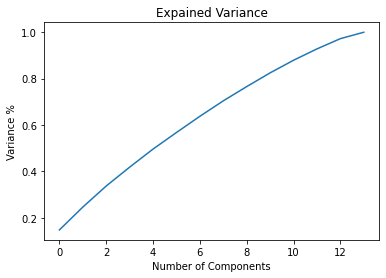

In [149]:
from sklearn.decomposition import PCA
pca=PCA()
principleComponents =pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Expained Variance')
plt.show()

Here 13 features are needed

# Model Building 

In [150]:
#Finding the best random state for spliting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)


Best Accuracy is 0.8618747485584015  on Random state 48


In [151]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [152]:
# function for model training and accuracy
def model_test(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=48)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(20*'--')

In [153]:
# instanciation of model
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
ad=AdaBoostClassifier(n_estimators=100)
models=[lr,dtc,rfc,gn,knn,ad]

In [154]:
# calling the funciton to find the best accuracy of model
for m in models:
    model_test(m)

LogisticRegression()
0.8256671583746815
[[5504  318]
 [ 982  653]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5822
           1       0.67      0.40      0.50      1635

    accuracy                           0.83      7457
   macro avg       0.76      0.67      0.70      7457
weighted avg       0.81      0.83      0.81      7457

----------------------------------------
DecisionTreeClassifier()
0.8059541370524339
[[5080  742]
 [ 705  930]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5822
           1       0.56      0.57      0.56      1635

    accuracy                           0.81      7457
   macro avg       0.72      0.72      0.72      7457
weighted avg       0.81      0.81      0.81      7457

----------------------------------------
RandomForestClassifier()
0.8630816682311921
[[5480  342]
 [ 679  956]]
              precision    recall  f1-score   support



# Cross Validation

In [155]:
from sklearn.model_selection import cross_val_score
for m in models:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of ',m)
    print(score.mean())
    print(20*'--')

Mean Accuracy of  LogisticRegression()
0.821671770094801
----------------------------------------
Mean Accuracy of  DecisionTreeClassifier()
0.8093338361359803
----------------------------------------
Mean Accuracy of  RandomForestClassifier()
0.8527512006427032
----------------------------------------
Mean Accuracy of  GaussianNB()
0.7744996893545121
----------------------------------------
Mean Accuracy of  KNeighborsClassifier()
0.8229795384237981
----------------------------------------
Mean Accuracy of  AdaBoostClassifier(n_estimators=100)
0.8631445584773623
----------------------------------------


# RUC_AUC Score

AUC Score of  LogisticRegression()
0.6673731829031059


----------------------------------------
AUC Score of  DecisionTreeClassifier()
0.9311062900018591


----------------------------------------
AUC Score of  RandomForestClassifier()
0.9418407618943286


----------------------------------------
AUC Score of  GaussianNB()
0.7732580310786228


----------------------------------------
AUC Score of  KNeighborsClassifier()
0.7864209353297746


----------------------------------------
AUC Score of  AdaBoostClassifier(n_estimators=100)
0.7581760023702346


----------------------------------------


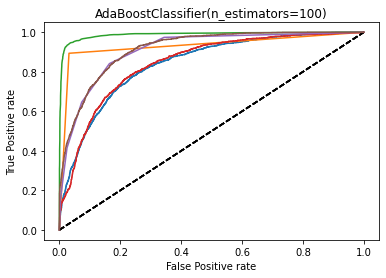

In [157]:
# code for RUC_AUC Score
from sklearn.metrics import roc_curve, roc_auc_score
for m in models:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thesholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of ',m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print(20*'--')

Among all the models the random forest is the best model with 86% accuracy , 85% cross validation and 94% AUC_RUC curve.

# Hyper Parameter Tuning

In [158]:
#setting the parameters for best tuning
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,200],'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_split':[2,3,4,5]}
`

In [159]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GSV.fit(x_train,y_train)
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_split': 5,
 'n_estimators': 100}

In [160]:
#Finding the accuracy with best parameters
final_mod=RandomForestClassifier(criterion='gini',max_depth=9,min_samples_split=5,n_estimators=100)
final_mod.fit(x,y)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.97291135845514


After Hyper Tuning model is performing at 86% accuracy

# Saving the Model

In [161]:
import joblib
joblib.dump(final_mod,'Cencus_Income.obj')

['Cencus_Income.obj']

Saved the model successfully